# HW1 data processing: World University Ranking

In [6]:
import pandas as pd
import random
import matplotlib.pyplot as plt

df = pd.read_csv('University Ranking.csv')
df

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1\r\nTop 0.1%,Harvard University\n CWUR Rating System: Le...,USA,1,1,1,1,1.0,100.0
1,2\r\nTop 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9.0,96.7
2,3\r\nTop 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2.0,95.2
3,4\r\nTop 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11.0,94.1
4,5\r\nTop 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4.0,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996\r\nTop 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917.0,66.0
1996,1997\r\nTop 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920.0,66.0
1997,1998\r\nTop 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919.0,66.0
1998,1999\r\nTop 9.8%,Bharathidasan University,India,64,-,-,-,1922.0,66.0


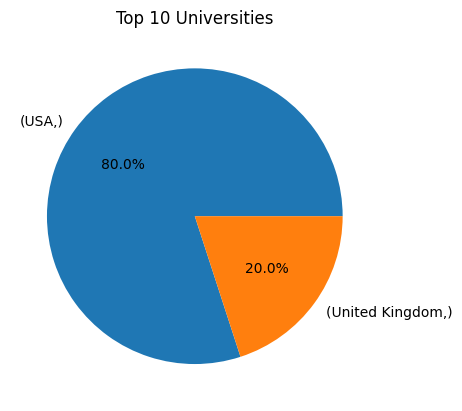

Location      
USA               8
United Kingdom    2
dtype: int64


In [4]:
# Q1 : find the top 10 universities in which contry
data = df[["Location"]].head(10)
top_10 = data.value_counts()
top_10.plot(kind='pie',autopct='%1.1f%%')
plt.title('Top 10 Universities')
plt.show()
print(top_10)

In [7]:
# Q2 : find the highest ranked university in each country and graph it
data = df.head(100)
highest = pd.DataFrame()
temp_df = data[data['National Rank'] == 1]
highest = temp_df.loc[:,['Location','Institution','World Rank']]
highest

,Location,Institution,World Rank
0,USA,Harvard University\n CWUR Rating System: Le...,1\r\nTop 0.1%
3,United Kingdom,University of Cambridge\n Education: A+; Empl...,4\r\nTop 0.1%
12,Japan,University of Tokyo,13\r\nTop 0.1%
20,France,PSL University,21\r\nTop 0.2%
22,Canada,University of Toronto,23\r\nTop 0.2%
29,Switzerland,ETH Zurich,30\r\nTop 0.2%
30,South Korea,Seoul National University,31\r\nTop 0.2%
34,Denmark,University of Copenhagen,35\r\nTop 0.2%
37,Sweden,Karolinska Institute,38\r\nTop 0.2%
43,China,Tsinghua University,44\r\nTop 0.3%


In [8]:
# Q3 : the top 100 education rank of universities
temp_df = df[["Institution","Education Rank"]]
temp_df = temp_df[temp_df['Education Rank'] != '-']
temp_df = temp_df.dropna(subset=['Education Rank'])
educate_rank = temp_df[temp_df['Education Rank'].astype(int) < 100]
educate_rank

,Institution,Education Rank
0,Harvard University\n CWUR Rating System: Le...,1
1,Massachusetts Institute of Technology\n Educa...,4
2,Stanford University\n Education: A+; Employab...,11
3,University of Cambridge\n Education: A+; Empl...,3
4,University of Oxford\n Education: A+; Employa...,7
...,...,...
1596,Grinnell College,49
1676,Reed College,62
1708,Ohio Wesleyan University,63
1842,Cooper Union,48


In [9]:
#Q4 : the top 100 faculty rank of universities
temp_df = df[["Institution","Faculty Rank"]]
temp_df = temp_df[temp_df['Faculty Rank'] != '-']
temp_df = temp_df.dropna(subset=['Faculty Rank'])
faculty_rank = temp_df[temp_df['Faculty Rank'].astype(int) < 100]
faculty_rank


,Institution,Faculty Rank
0,Harvard University\n CWUR Rating System: Le...,1
1,Massachusetts Institute of Technology\n Educa...,3
2,Stanford University\n Education: A+; Employab...,2
3,University of Cambridge\n Education: A+; Empl...,5
4,University of Oxford\n Education: A+; Employa...,9
...,...,...
385,University of Parma,93
694,Sciences Po,68
874,Jawaharlal Nehru University,98
939,Meijo University,38


In [10]:
#Q5 : the top 100 research rank of universities
temp_df = df[["Institution","Research Rank"]]
temp_df = temp_df[temp_df['Research Rank'] != '-']
temp_df = temp_df.dropna(subset=['Research Rank'])
Research_rank = temp_df[temp_df['Research Rank'].astype(int) <= 100]
Research_rank = Research_rank.sort_values(by=['Research Rank'])
Research_rank

,Institution,Research Rank
0,Harvard University\n CWUR Rating System: Le...,1.0
2,Stanford University\n Education: A+; Employab...,2.0
22,University of Toronto,3.0
4,University of Oxford\n Education: A+; Employa...,4.0
18,University College London,5.0
...,...,...
140,Lund University,96.0
65,University of Colorado Boulder,97.0
111,University of Texas MD Anderson Cancer Center,98.0
92,University of Bristol,99.0


In [11]:
# Q6 : the top 100 enployable rank of universities
temp_df = df[["Institution","Employability Rank"]]
temp_df = temp_df[temp_df['Employability Rank'] != '-']
temp_df = temp_df.dropna(subset=['Employability Rank'])
Employability_rank = temp_df[temp_df['Employability Rank'].astype(int) <= 100]
Employability_rank

,Institution,Employability Rank
0,Harvard University\n CWUR Rating System: Le...,1
1,Massachusetts Institute of Technology\n Educa...,12
2,Stanford University\n Education: A+; Employab...,4
3,University of Cambridge\n Education: A+; Empl...,25
4,University of Oxford\n Education: A+; Employa...,27
...,...,...
1731,Indian Institute of Management Calcutta,72
1850,Kettering University,79
1909,ESCP Business School,97
1956,"Graduate School & Training Center, Research In...",71


Location      
USA               50
United Kingdom     9
China              6
Germany            6
France             5
Canada             4
Netherlands        4
Japan              3
Switzerland        3
Australia          2
Israel             2
Sweden             2
Denmark            1
Norway             1
Singapore          1
South Korea        1
dtype: int64                                             Institution  Score
0     Harvard University\n  CWUR Rating System:   Le...  100.0
1     Massachusetts Institute of Technology\n  Educa...   96.7
2     Stanford University\n  Education: A+; Employab...   95.2
3     University of Cambridge\n  Education: A+; Empl...   94.1
4     University of Oxford\n  Education: A+; Employa...   93.3
...                                                 ...    ...
1995                      Chongqing Jiaotong University   66.0
1996              University of Arkansas at Little Rock   66.0
1997                         Van Yüzüncü Yıl University   66.0
1998  

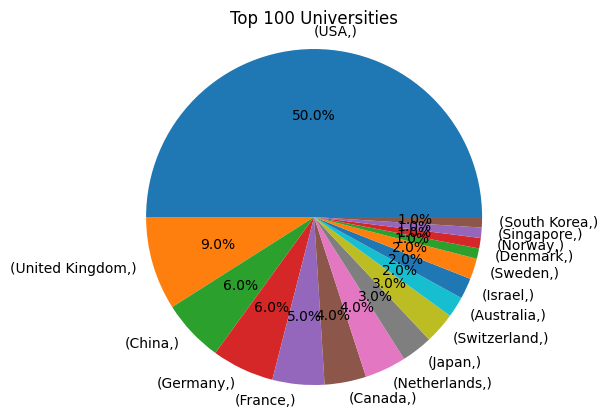

In [17]:
# Q7 : the top 100 universities' scorce and the proportion of each country
data = df.head(100)
score = df.loc[:,['Institution','Score']]
propertion = data.loc[:,['Location']].value_counts()
propertion.plot(kind='pie',autopct='%1.1f%%',)
print(propertion,score)
plt.title('Top 100 Universities')
plt.axis('equal')
plt.show()

Location      
USA               69
China             20
United Kingdom    19
Germany           12
France            10
Canada             8
Netherlands        8
Switzerland        7
Japan              7
Australia          7
dtype: int64


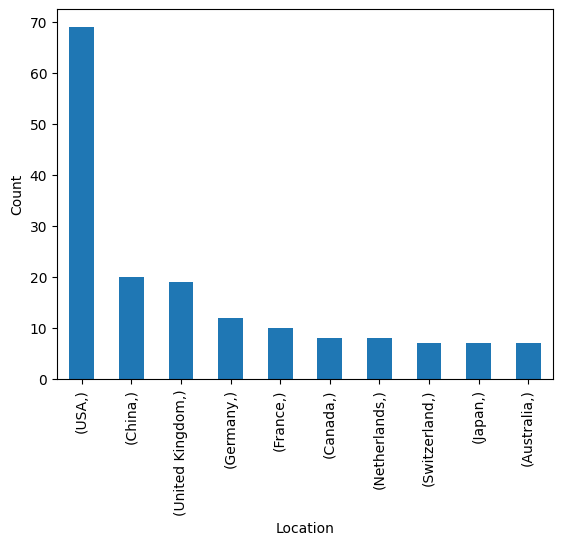

In [15]:
# Q8 : the count of top 200 universities in each country and compare the top 10 countries
top200 = df.loc[:,['Location']].head(200)
top_10_country = top200.value_counts().head(10)
print(top_10_country)
top_10_country.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [18]:
# Q9 : The National Rank of USA
temp_df = df[df['Location'] == 'USA']
USA_Rank = temp_df.loc[:,['Institution','National Rank']]
print(USA_Rank)

                                            Institution  National Rank
0     Harvard University\n  CWUR Rating System:   Le...              1
1     Massachusetts Institute of Technology\n  Educa...              2
2     Stanford University\n  Education: A+; Employab...              3
5     Princeton University\n  Education: A+; Employa...              4
6     University of Chicago\n  Education: A+; Employ...              5
...                                                 ...            ...
1940                                   Hamilton College            328
1950                                    Drew University            329
1977                          University of New Orleans            330
1984                                  Wellesley College            331
1996              University of Arkansas at Little Rock            332

[332 rows x 2 columns]


In [19]:
# Q10 : The rank of Taiwan University
temp_df = df[df['Location'] == 'Taiwan']
Taiwan_Ranlk = temp_df.loc[:,['Institution','World Rank']]
print(Taiwan_Ranlk)

                                            Institution        World Rank
101                          National Taiwan University   102\r\nTop 0.5%
316            National Yang Ming Chiao Tung University   317\r\nTop 1.6%
360                      National Cheng Kung University   361\r\nTop 1.8%
422                       National Tsing Hua University   423\r\nTop 2.1%
513                    China Medical University, Taiwan   514\r\nTop 2.6%
589                               Chang Gung University   590\r\nTop 2.9%
615                         National Central University   616\r\nTop 3.1%
685                           Taipei Medical University   686\r\nTop 3.4%
737                     National Chung Hsing University   738\r\nTop 3.6%
775                        Kaohsiung Medical University   776\r\nTop 3.8%
804   National Taiwan University of Science and Tech...     805\r\nTop 4%
846                     National Sun Yat-sen University   847\r\nTop 4.2%
1036                  National Taiwan 